In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
diabetes=pd.read_csv('diabetesProjectFinal.csv')

In [5]:
diabetes.head(1)

,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive


In [31]:
diabetes['Gender'] = diabetes['Gender'].replace({'Male': 1, 'Female': 0})
diabetes['Polyuria'] = diabetes['Polyuria'].replace({'Yes': 1, 'No': 0})
diabetes['Polydipsia'] = diabetes['Polydipsia'].replace({'Yes': 1, 'No': 0})
diabetes['Sudden weight loss'] = diabetes['Sudden weight loss'].replace({'Yes': 1, 'No': 0})
diabetes['Weakness'] = diabetes['Weakness'].replace({'Yes': 1, 'No': 0})
diabetes['Polyphagia'] = diabetes['Polyphagia'].replace({'Yes': 1, 'No': 0})
diabetes['Genital thrush'] = diabetes['Genital thrush'].replace({'Yes': 1, 'No': 0})
diabetes['Visual blurring'] = diabetes['Visual blurring'].replace({'Yes': 1, 'No': 0})
diabetes['Itching'] = diabetes['Itching'].replace({'Yes': 1, 'No': 0})
diabetes['Irritability'] = diabetes['Irritability'].replace({'Yes': 1, 'No': 0})
diabetes['Delayed healing'] = diabetes['Delayed healing'].replace({'Yes': 1, 'No': 0})
diabetes['Partial paresis'] = diabetes['Partial paresis'].replace({'Yes': 1, 'No': 0})
diabetes['Muscle stiffness'] = diabetes['Muscle stiffness'].replace({'Yes': 1, 'No': 0})
diabetes['Alopecia'] = diabetes['Alopecia'].replace({'Yes': 1, 'No': 0})
diabetes['Obesity'] = diabetes['Obesity'].replace({'Yes': 1, 'No': 0})
diabetes['Class'] = diabetes['Class'].replace({'Positive': 1, 'Negative': 0})

In [32]:
diabetes.head(1)

,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1


In [33]:
diabetes.isna().sum() #no missing values that need to be dealth with

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
Sudden weight loss    0
Weakness              0
Polyphagia            0
Genital thrush        0
Visual blurring       0
Itching               0
Irritability          0
Delayed healing       0
Partial paresis       0
Muscle stiffness      0
Alopecia              0
Obesity               0
Class                 0
dtype: int64

In [9]:
import seaborn as sns

([<matplotlib.axis.XTick at 0x1fdf5e9f920>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

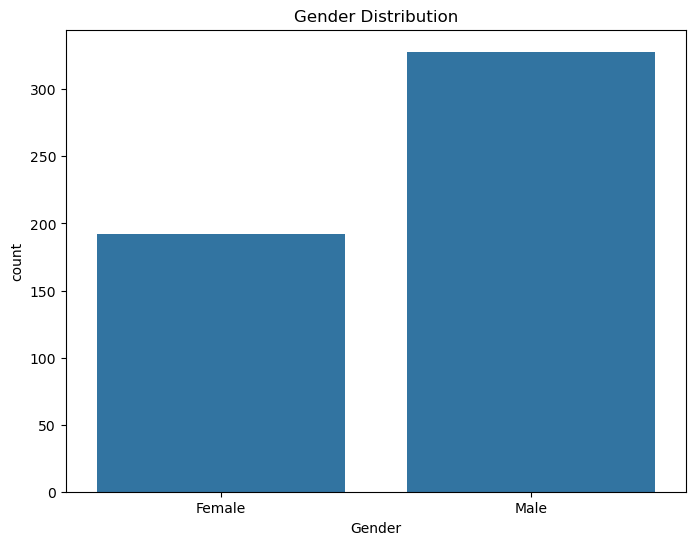

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=diabetes)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

Text(0.5, 1.0, 'Correlation Heatmap')

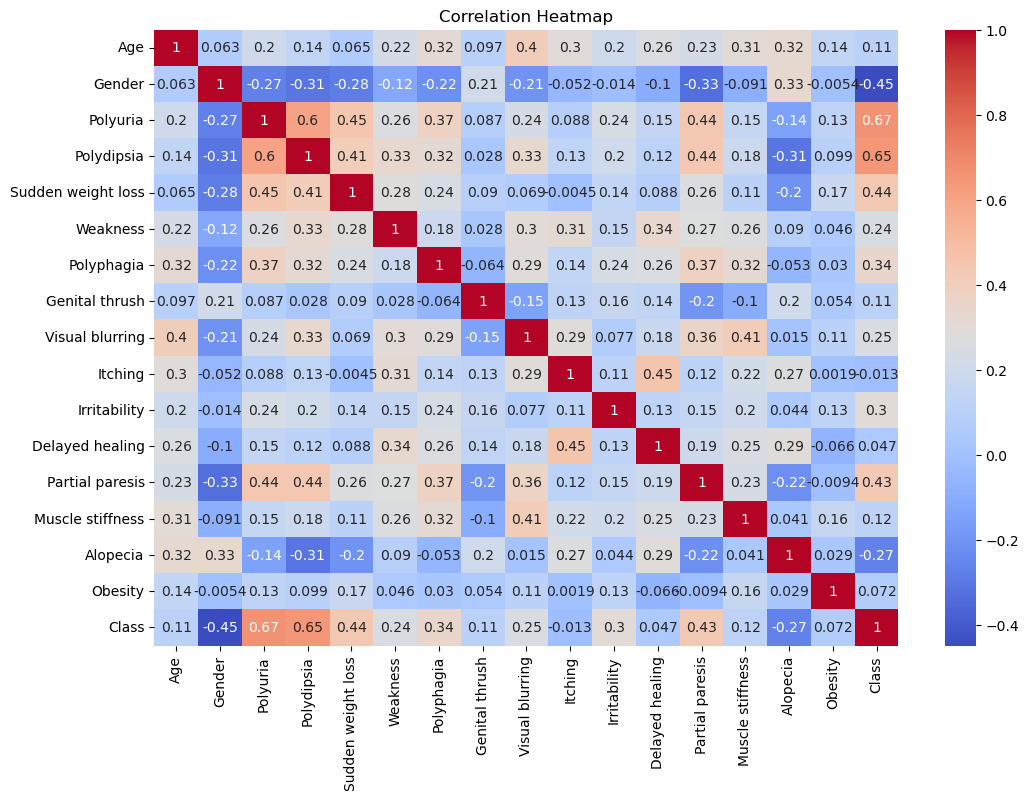

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(diabetes.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

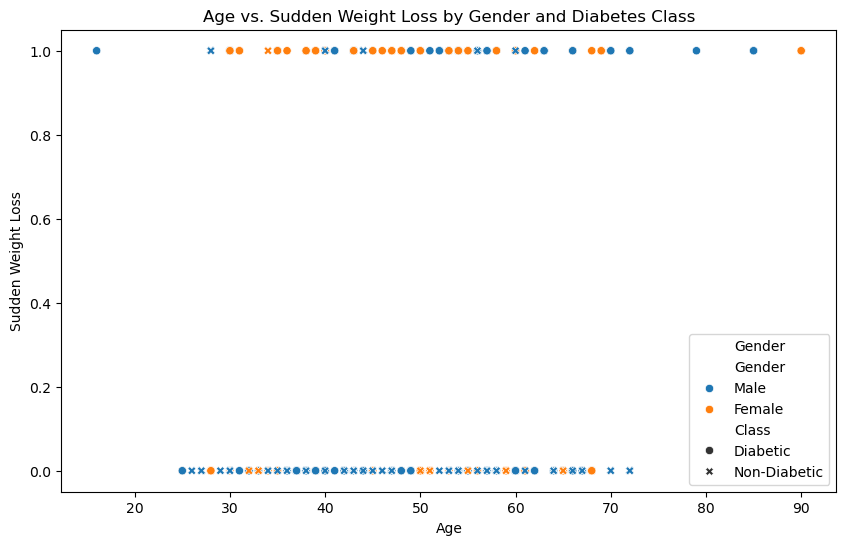

In [35]:
diabetes_copy = diabetes.copy()

# Replace 0 and 1 in 'Class' column with 'Non-Diabetic' and 'Diabetic'
diabetes_copy['Class'] = diabetes_copy['Class'].replace({0: 'Non-Diabetic', 1: 'Diabetic'})

# Replace 0 and 1 in 'Gender' column with 'Female' and 'Male'
diabetes_copy['Gender'] = diabetes_copy['Gender'].replace({0: 'Female', 1: 'Male'})

# Plot the scatter plot with Age vs Sudden Weight Loss, colored by Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Sudden weight loss', hue='Gender', style='Class', data=diabetes_copy)
plt.title('Age vs. Sudden Weight Loss by Gender and Diabetes Class')
plt.xlabel('Age')
plt.ylabel('Sudden Weight Loss')
plt.legend(title='Gender')

Text(0.5, 1.0, 'Age Distribution by Diabetes Class')

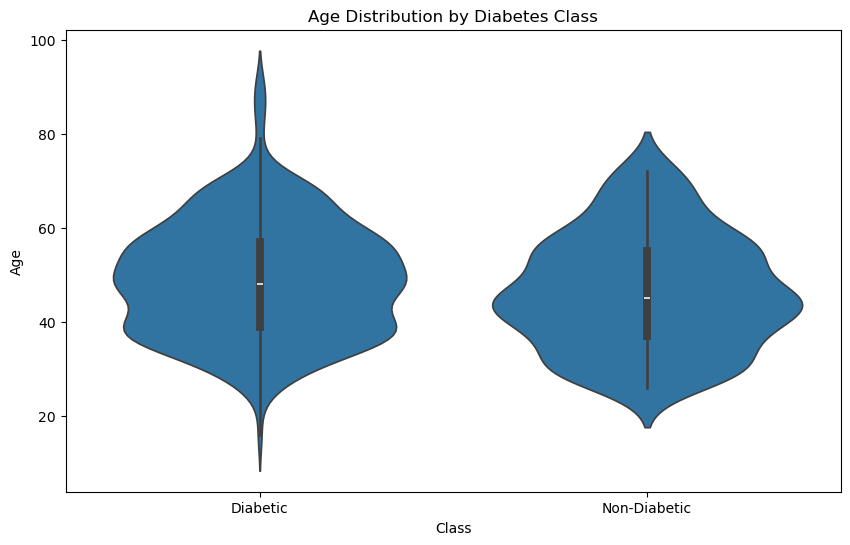

In [25]:
diabetes_copy = diabetes.copy()
diabetes_copy['Class'] = diabetes_copy['Class'].replace({0: 'Non-Diabetic', 1: 'Diabetic'})

plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Age', data=diabetes_copy)
plt.title('Age Distribution by Diabetes Class')

In [37]:
from sklearn.utils import resample

In [38]:
diabetes_male = diabetes[diabetes.Gender == 1]
diabetes_female = diabetes[diabetes.Gender == 0]

diabetes_female_upsampled = resample(diabetes_female, 
                                     replace=True,     # sample with replacement
                                     n_samples=len(diabetes_male),    # to match majority class
                                     random_state=42)  # reproducible results

diabetes_balanced = pd.concat([diabetes_male, diabetes_female_upsampled])

In [43]:
diabetes = diabetes_balanced

In [45]:
diabetes['Gender'].value_counts() # here 1 stands for Male 0 for Female

Gender
1    328
0    328
Name: count, dtype: int64

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

In [47]:
X = diabetes.drop('Class', axis=1)  # Features
y = diabetes['Class']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
# Evaluate the model
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Save the model
joblib.dump(model, 'diabetes_predictor_model.pkl')


Accuracy: 0.9772727272727273


['diabetes_predictor_model.pkl']

In [62]:
pip install streamlit scikit-learn pandas joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
